## Adding 8 dyes to initial conditions

This notebook adds 8 distinct dyes to an initial ROMS file for a physics only domain

In [19]:
import subprocess
import os

import netCDF4
import numpy as np
import glob
import time
import matplotlib.pyplot as plt
import copy
import xarray as xr
from datetime import datetime, timedelta 
from ocean_c_lab_tools import *

In [20]:
## calculating depth of each cell
grid=xr.open_mfdataset('/expanse/lustre/projects/cos100/uheede/Iceland4_grd.nc')
h=grid['h'].values

mask_rho=grid['mask_rho'].values

# zeta is the sea surface height at any given time, here I am using zeta from the initial file

x=xr.open_dataset('/expanse/lustre/projects/cos100/uheede/C-Star/setup_tools/Iceland4_dye_newpatch/Iceland4_ini.nc')
zeta=x['zeta'].mean('time').values
t=x['temp'].values



In [21]:
x=xr.open_dataset('/expanse/lustre/projects/cos100/uheede/C-Star/setup_tools/Iceland4_dye_newpatch/Iceland4_ini.nc')

## Defining radius, amplitude and location
We define the location in roms coordinates, set the amplitude of the centre, and set the radius of each patch

In [22]:
radius = 4;
amplitude = 1;
center1 = [1200, 560];
center2 = [1240, 615];
center3 = [1025, 575];
center4 = [1025, 610];
center5 = [1025, 640];
center6 = [820, 490];
center7 = [730, 410];
center8 = [600, 310];


dye1=np.empty_like(t)*0
dye2=np.empty_like(t)*0
dye3=np.empty_like(t)*0
dye4=np.empty_like(t)*0
dye5=np.empty_like(t)*0
dye6=np.empty_like(t)*0
dye7=np.empty_like(t)*0
dye8=np.empty_like(t)*0

dye1[:,99,center1[1],center1[0]]=amplitude
dye2[:,99,center2[1],center2[0]]=amplitude
dye3[:,99,center3[1],center3[0]]=amplitude
dye4[:,99,center4[1],center4[0]]=amplitude
dye5[:,99,center5[1],center5[0]]=amplitude
dye6[:,99,center6[1],center6[0]]=amplitude
dye7[:,99,center7[1],center7[0]]=amplitude
dye8[:,99,center8[1],center8[0]]=amplitude

We then go through a loop to make each patch

In [23]:
for i in np.arange((center1[0] - radius),(center1[0] + radius)):
    for j in np.arange((center1[1] - radius),(center1[1] + radius)):
        distance=(((i-center1[0])**2)+((j-center1[1])**2))**(1/2)
        dye1[:,:,j,i]=dye1[:,:,center1[1],center1[0]]*0.5**distance
        if np.max(dye1[:,:,j,i])<1/128:
            dye1[:,:,j,i]=0
        
for k in np.arange(0,100):
    dye1[:,k,:,:]=dye1[:,99,:,:]*0.7**(99-k)
#    if np.max(dye1[:,k,:,:])<1/128:
#        dye1[:,k,:,:]=0

for i in np.arange((center2[0] - radius),(center2[0] + radius)):
    for j in np.arange((center2[1] - radius),(center2[1] + radius)):
        distance=(((i-center2[0])**2)+((j-center2[1])**2))**(1/2)
        dye2[:,:,j,i]=dye2[:,:,center2[1],center2[0]]*0.5**distance
        if np.max(dye2[:,:,j,i])<1/128:
            dye2[:,:,j,i]=0
        
for k in np.arange(0,100):
    dye2[:,k,:,:]=dye2[:,99,:,:]*0.7**(99-k)
#    if np.max(dye2[:,k,:,:])<1/128:
#        dye2[:,k,:,:]=0

for i in np.arange((center3[0] - radius),(center3[0] + radius)):
    for j in np.arange((center3[1] - radius),(center3[1] + radius)):
        distance=(((i-center3[0])**2)+((j-center3[1])**2))**(1/2)
        dye3[:,:,j,i]=dye3[:,:,center3[1],center3[0]]*0.5**distance
        if np.max(dye3[:,:,j,i])<1/64:
            dye3[:,:,j,i]=0
        
for k in np.arange(0,100):
    dye3[:,k,:,:]=dye3[:,99,:,:]*0.7**(99-k)
#    if np.max(dye3[:,k,:,:])<1/32:
#        dye3[:,k,:,:]=0

for i in np.arange((center4[0] - radius),(center4[0] + radius)):
    for j in np.arange((center4[1] - radius),(center4[1] + radius)):
        distance=(((i-center4[0])**2)+((j-center4[1])**2))**(1/2)
        dye4[:,:,j,i]=dye4[:,:,center4[1],center4[0]]*0.5**distance
        if np.max(dye4[:,:,j,i])<1/64:
            dye4[:,:,j,i]=0
        
for k in np.arange(0,100):
    dye4[:,k,:,:]=dye4[:,99,:,:]*0.7**(99-k)
#    if np.max(dye4[:,k,:,:])<1/128:
#        dye4[:,k,:,:]=0

for i in np.arange((center5[0] - radius),(center5[0] + radius)):
    for j in np.arange((center5[1] - radius),(center5[1] + radius)):
        distance=(((i-center5[0])**2)+((j-center5[1])**2))**(1/2)
        dye5[:,:,j,i]=dye5[:,:,center5[1],center5[0]]*0.5**distance
        if np.max(dye5[:,:,j,i])<1/64:
            dye5[:,:,j,i]=0
        
for k in np.arange(0,100):
    dye5[:,k,:,:]=dye5[:,99,:,:]*0.7**(99-k)
#    if np.max(dye5[:,k,:,:])<1/128:
#        dye5[:,k,:,:]=0

for i in np.arange((center6[0] - radius),(center6[0] + radius)):
    for j in np.arange((center6[1] - radius),(center6[1] + radius)):
        distance=(((i-center6[0])**2)+((j-center6[1])**2))**(1/2)
        dye6[:,:,j,i]=dye6[:,:,center6[1],center6[0]]*0.5**distance
        if np.max(dye6[:,:,j,i])<1/64:
            dye6[:,:,j,i]=0
        
for k in np.arange(0,100):
    dye6[:,k,:,:]=dye6[:,99,:,:]*0.7**(99-k)
#    if np.max(dye6[:,k,:,:])<1/32:
#        dye6[:,k,:,:]=0

for i in np.arange((center7[0] - radius),(center7[0] + radius)):
    for j in np.arange((center7[1] - radius),(center7[1] + radius)):
        distance=(((i-center7[0])**2)+((j-center7[1])**2))**(1/2)
        dye7[:,:,j,i]=dye7[:,:,center7[1],center7[0]]*0.5**distance
        if np.max(dye7[:,:,j,i])<1/64:
            dye7[:,:,j,i]=0
        
for k in np.arange(0,100):
    dye7[:,k,:,:]=dye7[:,99,:,:]*0.7**(99-k)
#    if np.max(dye7[:,k,:,:])<1/128:
#        dye7[:,k,:,:]=0

for i in np.arange((center8[0] - radius),(center8[0] + radius)):
    for j in np.arange((center8[1] - radius),(center8[1] + radius)):
        distance=(((i-center8[0])**2)+((j-center8[1])**2))**(1/2)
        dye8[:,:,j,i]=dye8[:,:,center8[1],center8[0]]*0.5**distance
        if np.max(dye8[:,:,j,i])<1/64:
            dye8[:,:,j,i]=0
        
for k in np.arange(0,100):
    dye8[:,k,:,:]=dye8[:,99,:,:]*0.7**(99-k)
#    if np.max(dye8[:,k,:,:])<1/128:
#        dye8[:,k,:,:]=0


In [24]:
x['dye1']=(('time', 's_rho','eta_rho','xi_rho'), dye1)
x['dye2']=(('time', 's_rho','eta_rho','xi_rho'), dye2)
x['dye3']=(('time', 's_rho','eta_rho','xi_rho'), dye3)
x['dye4']=(('time', 's_rho','eta_rho','xi_rho'), dye4)
x['dye5']=(('time', 's_rho','eta_rho','xi_rho'), dye5)
x['dye6']=(('time', 's_rho','eta_rho','xi_rho'), dye6)
x['dye7']=(('time', 's_rho','eta_rho','xi_rho'), dye7)
x['dye8']=(('time', 's_rho','eta_rho','xi_rho'), dye8)

## Plotting the patches

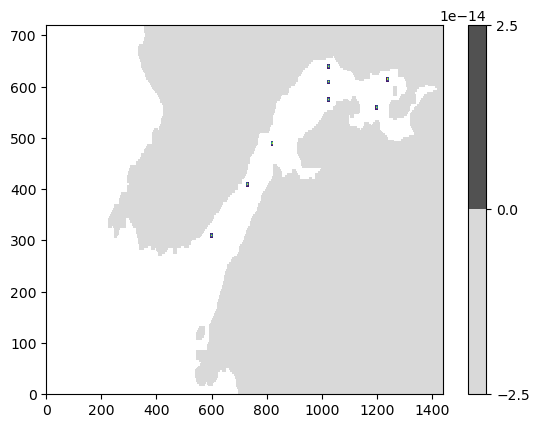

In [34]:
plt.contourf(x['dye1'].where(dye1>0).isel(time=0).isel(s_rho=99))
plt.contourf(x['dye2'].where(dye2>0).isel(time=0).isel(s_rho=99))
plt.contourf(x['dye3'].where(dye3>0).isel(time=0).isel(s_rho=99))
plt.contourf(x['dye4'].where(dye4>0).isel(time=0).isel(s_rho=99))
plt.contourf(x['dye5'].where(dye5>0).isel(time=0).isel(s_rho=99))
plt.contourf(x['dye6'].where(dye6>0).isel(time=0).isel(s_rho=99))
plt.contourf(x['dye7'].where(dye7>0).isel(time=0).isel(s_rho=99))
plt.contourf(x['dye8'].where(dye8>0).isel(time=0).isel(s_rho=99))

mask_rho=grid['mask_rho']
plt.contourf(mask_rho.where(mask_rho!=1),cmap='Greys')
#plt.xlim([1230,1270])
#plt.ylim([600,640])
plt.colorbar()

In [27]:
x.to_netcdf('/expanse/lustre/projects/cos100/uheede/C-Star/setup_tools/Iceland4_dye_newpatch/Iceland4_zerodye.nc')